In [314]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [315]:
def str_to_float(value):
    return float(str(value).replace(',', '').replace(',', '').replace('\n', ''))

In [327]:
def date_format(date):
    date = date.split('-')
    return f'{date[0]}-{date[1].split(" ")[1]}'

In [329]:
djia = pd.read_csv('./DJIA.csv')
djia['종가'] = djia['종가'].apply(str_to_float)
djia['날짜'] = djia['날짜'].apply(date_format)
djia

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022-08,31511.09,"32,755.71","34,281.16","31,511.09",NaN,-4.07%
1,2022-07,32846.45,"30,740.97","32,906.21","30,145.31",NaN,6.71%
2,2022-06,30779.71,"33,156.31","33,270.83","29,654.59",NaN,-6.71%
3,2022-05,32991.97,"33,045.95","34,113.40","30,635.76",3.01B,0.04%
4,2022-04,32977.21,"34,740.89","35,492.22","32,913.15",7.22B,-4.91%
...,...,...,...,...,...,...,...
219,2004-05,10188.45,"10,227.27","10,386.32","9,852.19",4.02B,-0.36%
220,2004-04,10225.57,"10,357.52","10,570.81","10,219.18",4.53B,-1.28%
221,2004-03,10357.70,"10,582.25","10,695.55","10,007.49",4.97B,-2.14%
222,2004-02,10583.92,"10,487.78","10,753.63","10,434.67",3.82B,0.91%


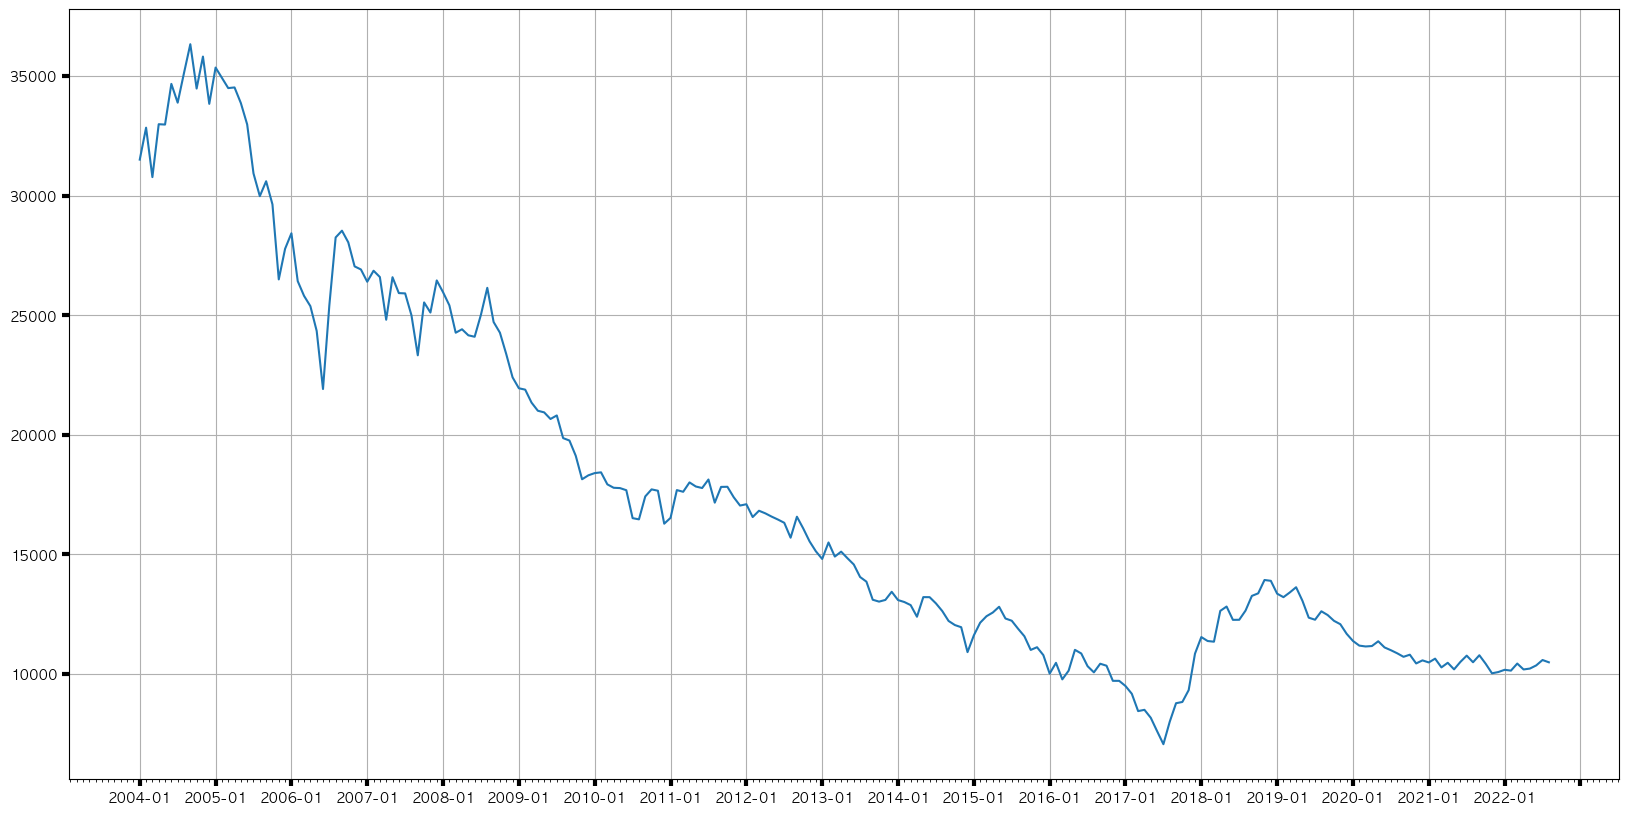

In [351]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(djia['날짜'][::-1], djia['종가'])
ax.xaxis.set_major_locator(MultipleLocator(12))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(width=3, length=5)
plt.grid()
plt.show()

In [334]:
nasdaq = pd.read_csv('./nasdaq_100.csv')
nasdaq['종가'] = nasdaq['종가'].apply(str_to_float)
nasdaq['날짜'] = nasdaq['날짜'].apply(date_format)
nasdaq

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022-08,12272.03,"12,877.69","13,720.71","12,240.83",NaN,-5.22%
1,2022-07,12947.97,"11,476.43","12,981.47","11,367.30",NaN,12.55%
2,2022-06,11503.72,"12,750.31","12,897.24","11,037.24",NaN,-9.00%
3,2022-05,12642.10,"12,864.83","13,556.67","11,493.11",1.09B,-1.65%
4,2022-04,12854.80,"14,886.91","15,161.89","12,835.48",4.50B,-13.37%
...,...,...,...,...,...,...,...
219,2004-05,1466.22,"1,409.06","1,469.23","1,372.46",NaN,4.63%
220,2004-04,1401.36,"1,438.91","1,508.37","1,401.36",NaN,-2.58%
221,2004-03,1438.41,"1,476.04","1,494.67","1,368.08",NaN,-2.17%
222,2004-02,1470.38,"1,497.78","1,524.09","1,452.49",NaN,-1.52%


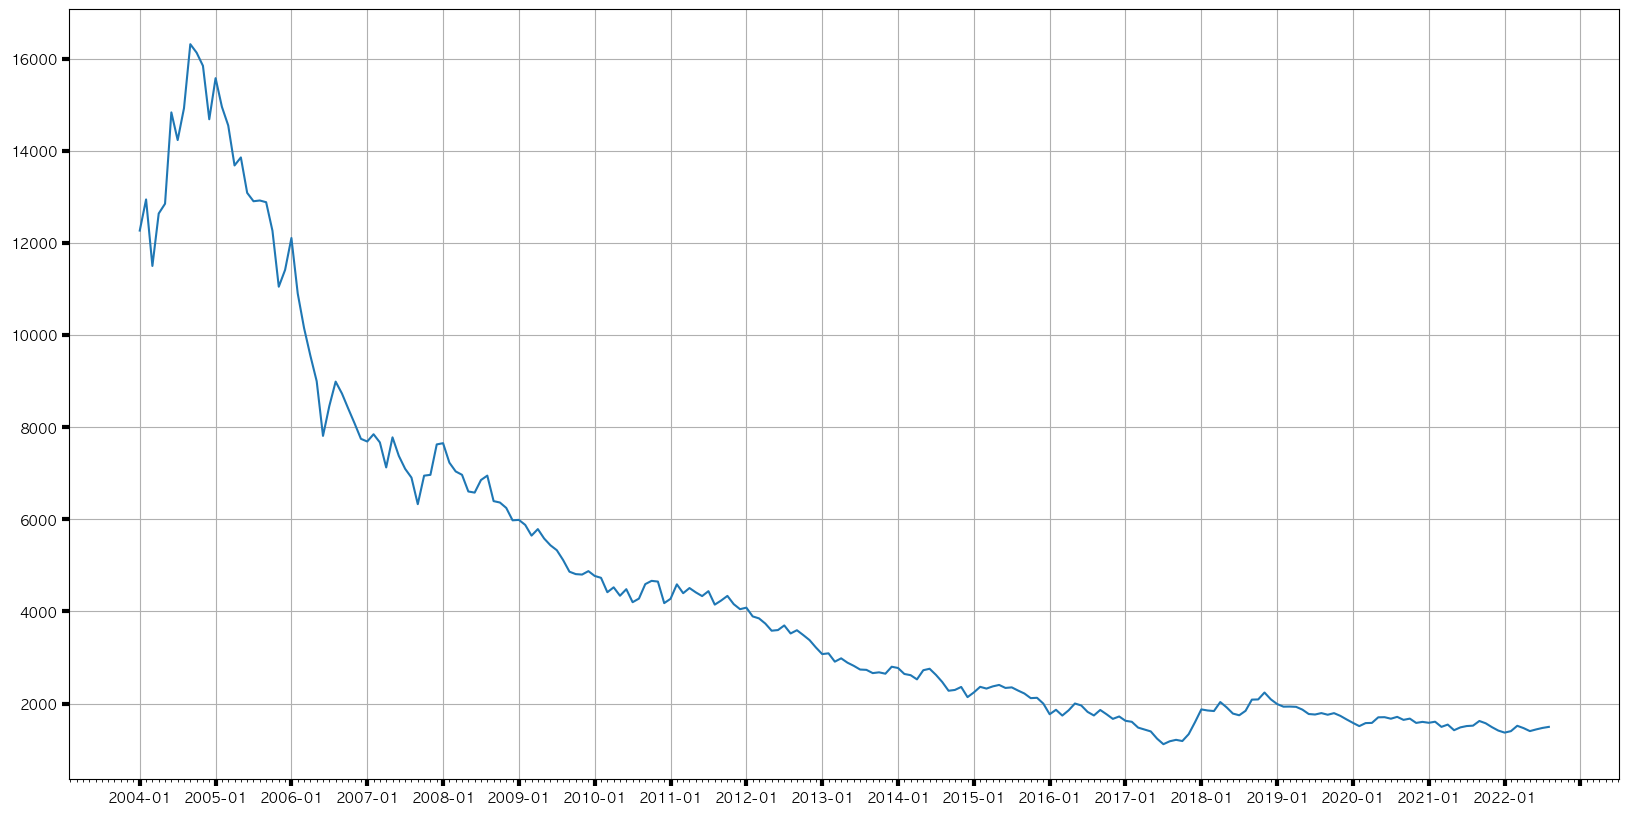

In [350]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(nasdaq['날짜'][::-1], nasdaq['종가'])
ax.xaxis.set_major_locator(MultipleLocator(12))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(width=3, length=5)
plt.grid()
plt.show()

In [336]:
snp = pd.read_csv('./S&P_500.csv')
snp['종가'] = snp['종가'].apply(str_to_float)
snp['날짜'] = snp['날짜'].apply(date_format)
snp

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022-08,3955.00,"4,103.38","4,325.50","3,954.90",NaN,-4.24%
1,2022-07,4130.29,"3,779.27","4,140.00","3,720.25",NaN,9.11%
2,2022-06,3785.38,"4,156.10","4,177.60","3,636.82",NaN,-8.39%
3,2022-05,4132.15,"4,132.70","4,307.90","3,810.50",NaN,0.01%
4,2022-04,4131.93,"4,547.90","4,593.90","4,123.87",NaN,-8.80%
...,...,...,...,...,...,...,...
219,2004-05,1120.68,"1,107.30","1,127.74","1,076.32",NaN,1.21%
220,2004-04,1107.30,"1,126.21","1,150.57","1,107.23",NaN,-1.68%
221,2004-03,1126.21,"1,144.94","1,163.23","1,087.06",NaN,-1.64%
222,2004-02,1144.94,"1,131.13","1,158.98","1,124.44",NaN,1.22%


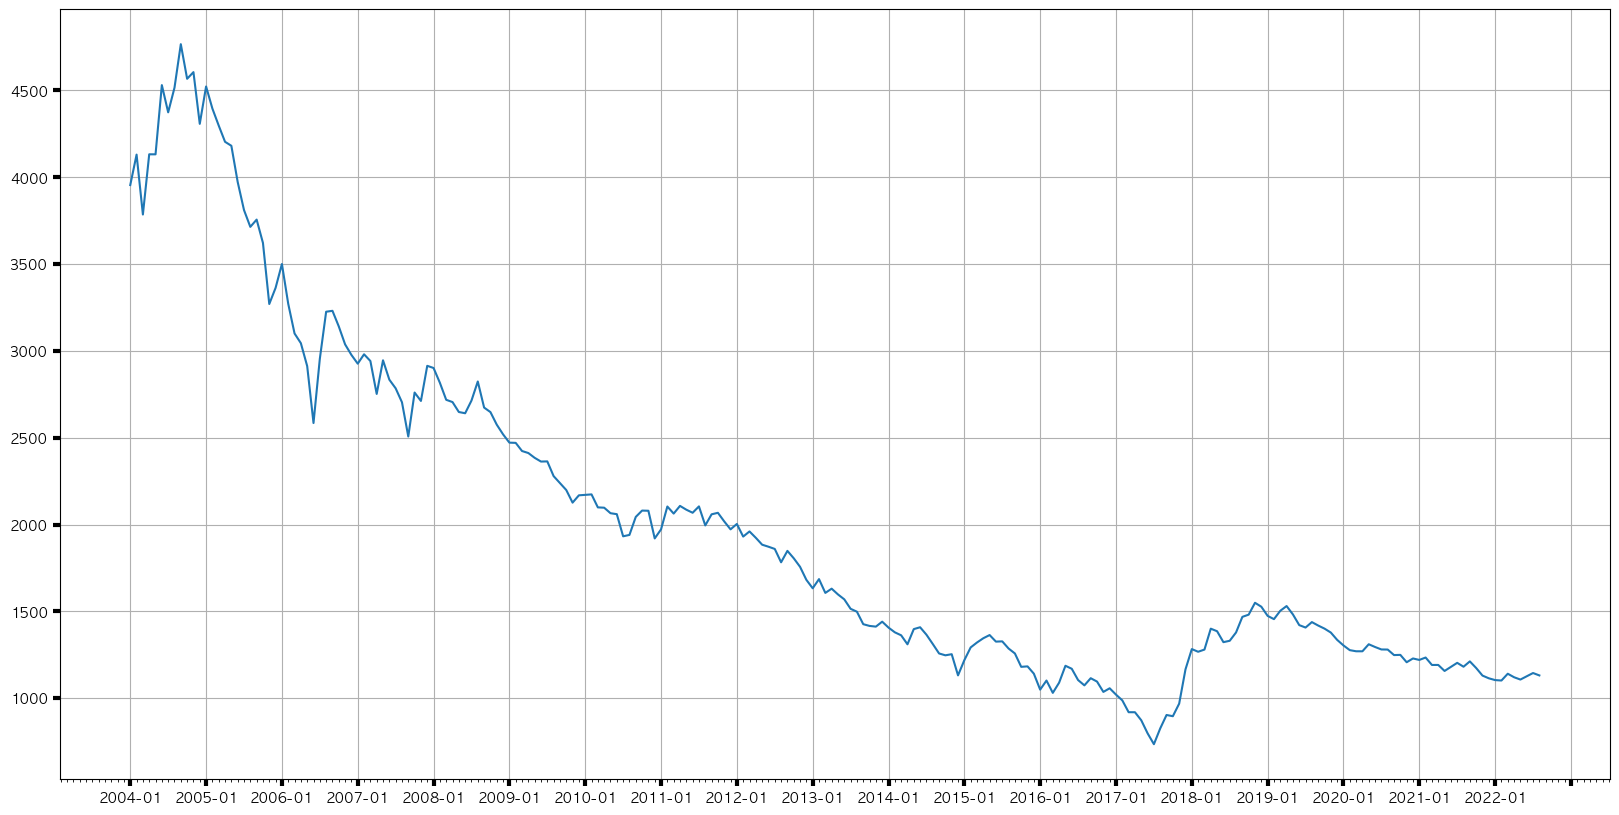

In [349]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(snp['날짜'][::-1], snp['종가'])
ax.xaxis.set_major_locator(MultipleLocator(12))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(width=3, length=5)
plt.grid()
plt.show()